In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
from scipy.optimize import minimize
import math as math
import scipy.stats as stats
from scipy.stats import anderson as ande
from scipy.stats import kstest
%matplotlib inline

In [98]:
# df = pd.read_csv('data5.csv')
df = pd.DataFrame([5,6,8.5,8.4,8,15,14.5,9.6,10.5,8.8],columns=['data'])
df

,data
0,5.0
1,6.0
2,8.5
3,8.4
4,8.0
5,15.0
6,14.5
7,9.6
8,10.5
9,8.8


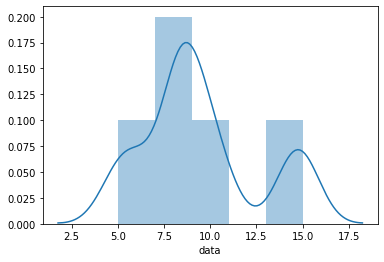

In [99]:
sns.distplot(df['data'])

In [104]:
# Gussain Parameter Estimation
# mean_guass = df['data'].mean()
# sd_guass = np.std(df['data'])
mean_guass = 10
sd_guass = 2

def guass(x):
    return ((1/(np.sqrt(2*np.pi)*sd_guass))*np.exp(-(0.5)*((x-mean_guass)/sd_guass)**2))
            
quad(guass,np.NINF,5)

(0.006209665325776138, 3.846983301282351e-11)

In [105]:
ks_df = pd.DataFrame(columns=['x_i','xi_sorted','Sn_x','F(x)','|Fx-Sn(x)|'])
ks_df['x_i'] = df['data']
ks_df['xi_sorted'] = np.sort(ks_df['x_i'])
ks_df['Sn_x'] = (df.index+1)/ks_df['x_i'].size
for i in range(len(ks_df['x_i'])):
    ks_df['F(x)'][i] = quad(guass,np.NINF,ks_df['xi_sorted'][i])[0]
    
ks_df['|Fx-Sn(x)|'] = abs(ks_df['Sn_x'] - ks_df['F(x)'])

C:\Users\Piyush Patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [106]:
ks_df

,x_i,xi_sorted,Sn_x,F(x),|Fx-Sn(x)|
0,5.0,5.0,0.1,0.00620967,0.0937903
1,6.0,6.0,0.2,0.0227501,0.17725
2,8.5,8.0,0.3,0.158655,0.141345
3,8.4,8.4,0.4,0.211855,0.188145
4,8.0,8.5,0.5,0.226627,0.273373
5,15.0,8.8,0.6,0.274253,0.325747
6,14.5,9.6,0.7,0.42074,0.27926
7,9.6,10.5,0.8,0.598706,0.201294
8,10.5,14.5,0.9,0.987776,0.0877755
9,8.8,15.0,1.0,0.99379,0.00620967


In [114]:
D = ks_df['|Fx-Sn(x)|'].max()
n = df['data'].size
alpha = 0.05
critical_value_ks = 1.36/math.sqrt(n)

if critical_value_ks>=D:
    print("We cannot reject null hypothesis")
else:
    print("Null Hypothesis rejected")

We cannot reject null hypothesis
